#### Cell 1: Imports and Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sklearn modules
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Display settings
%matplotlib inline
pd.set_option('display.max_columns', None)

#### Cell 2: Data Loading

In [3]:
# Load the dataset
# NOTE: Please ensure the path matches your local file location
file_path = r"C:\Users\abhi7\Downloads\Smart Fitness & Nutrition Analysis Dataset.csv" 

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found. Please update the path.")

Data loaded successfully.


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Workout_Frequency (days/week),Experience_Level,BMI,Calories,Burns Calories (per 30 min),cal_from_macros,pct_HRR,pct_maxHR,lean_mass_kg,expected_burn
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,26.800377,3.99,2.01,24.87,1806,342.58,2139.59,0.741237,0.835985,47.777394,685.1600
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,27.655021,4.00,2.01,23.48,1577,357.16,1711.65,0.551247,0.734270,40.809803,978.6184
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,24.320821,2.99,1.02,21.15,1608,359.63,1965.92,0.574534,0.708124,44.635580,654.5266
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,32.813572,3.99,1.99,32.45,2657,351.65,1627.28,0.744155,0.811150,63.007432,773.6300
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,17.307319,4.00,2.00,14.83,1470,329.36,2659.23,0.668405,0.789751,43.347504,711.4176


#### Cell 3: Basic Exploratory Data Analysis (EDA)

In [4]:
# Check shape and data types
print(f"Shape of data: {df.shape}")
print("\nData Types:")
print(df.dtypes)

# Check for missing values and duplicates
print(f"\nMissing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")

Shape of data: (20000, 21)

Data Types:
Age                              float64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                          float64
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
Calories                           int64
Burns Calories (per 30 min)      float64
cal_from_macros                  float64
pct_HRR                          float64
pct_maxHR                        float64
lean_mass_kg                     float64
expected_burn                    float64
dtype: object

Missing Values: 0
Duplicate Rows: 0


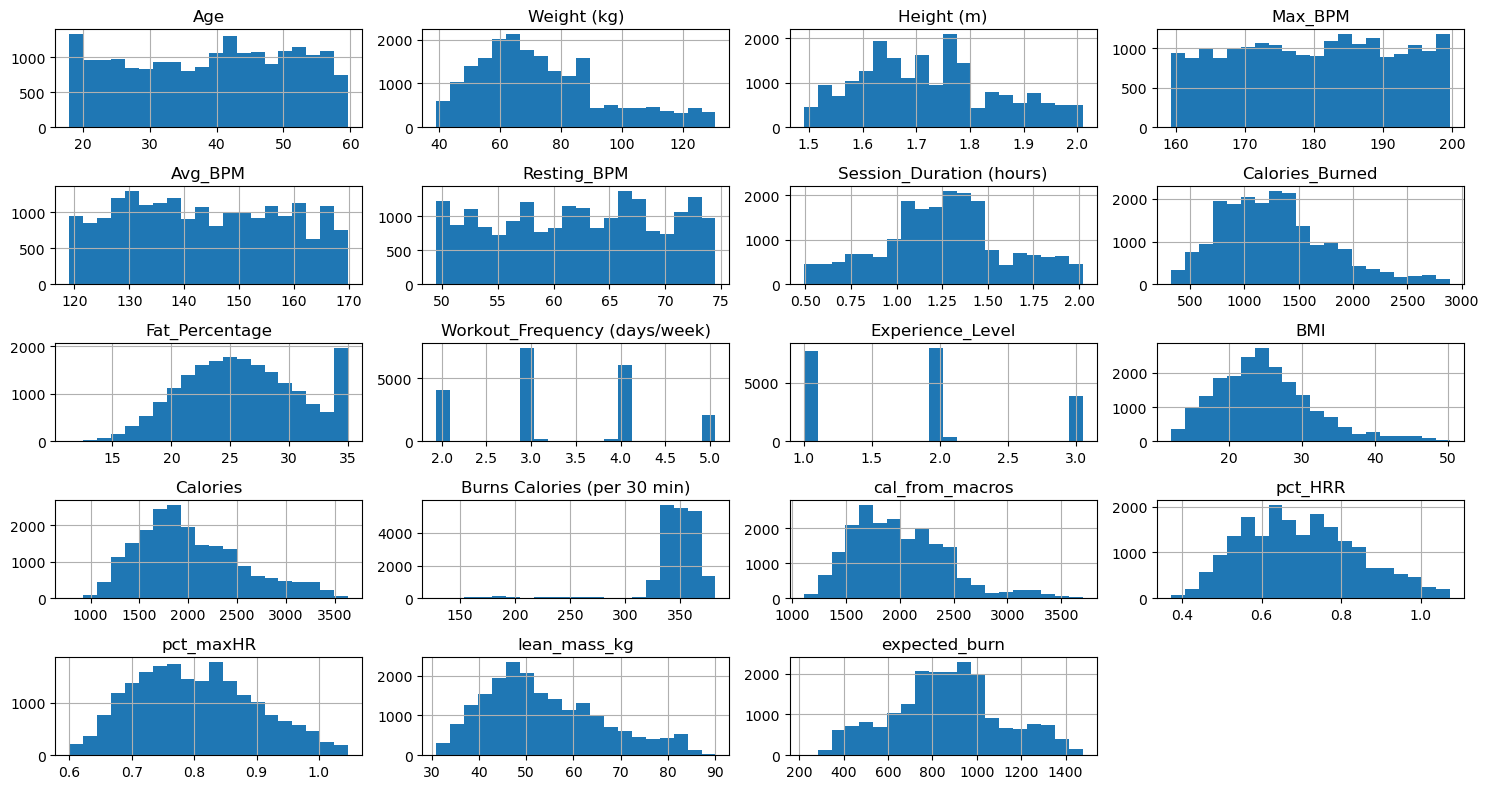

In [5]:
# plot histogram
df.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

#### Cell 4: Data Pre-processing

In [6]:
# Dropping categorical column 'Workout_Type' as per original analysis logic
# (Note: In a production model, you might want to One-Hot Encode this instead)
if 'Workout_Type' in df.columns:
    df = df.drop("Workout_Type", axis=1)
    print("Dropped 'Workout_Type' column.")

# Convert Categorical variables (like 'Gender') to numeric using One-Hot Encoding
# This converts 'Male'/'Female' into 0s and 1s
df_encoded = pd.get_dummies(df, drop_first=True)

# Verify all data is now numeric
print("Data Types after encoding:")
print(df_encoded.dtypes)

Dropped 'Workout_Type' column.
Data Types after encoding:
Age                              float64
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                          float64
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Fat_Percentage                   float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
Calories                           int64
Burns Calories (per 30 min)      float64
cal_from_macros                  float64
pct_HRR                          float64
pct_maxHR                        float64
lean_mass_kg                     float64
expected_burn                    float64
Gender_Male                         bool
dtype: object


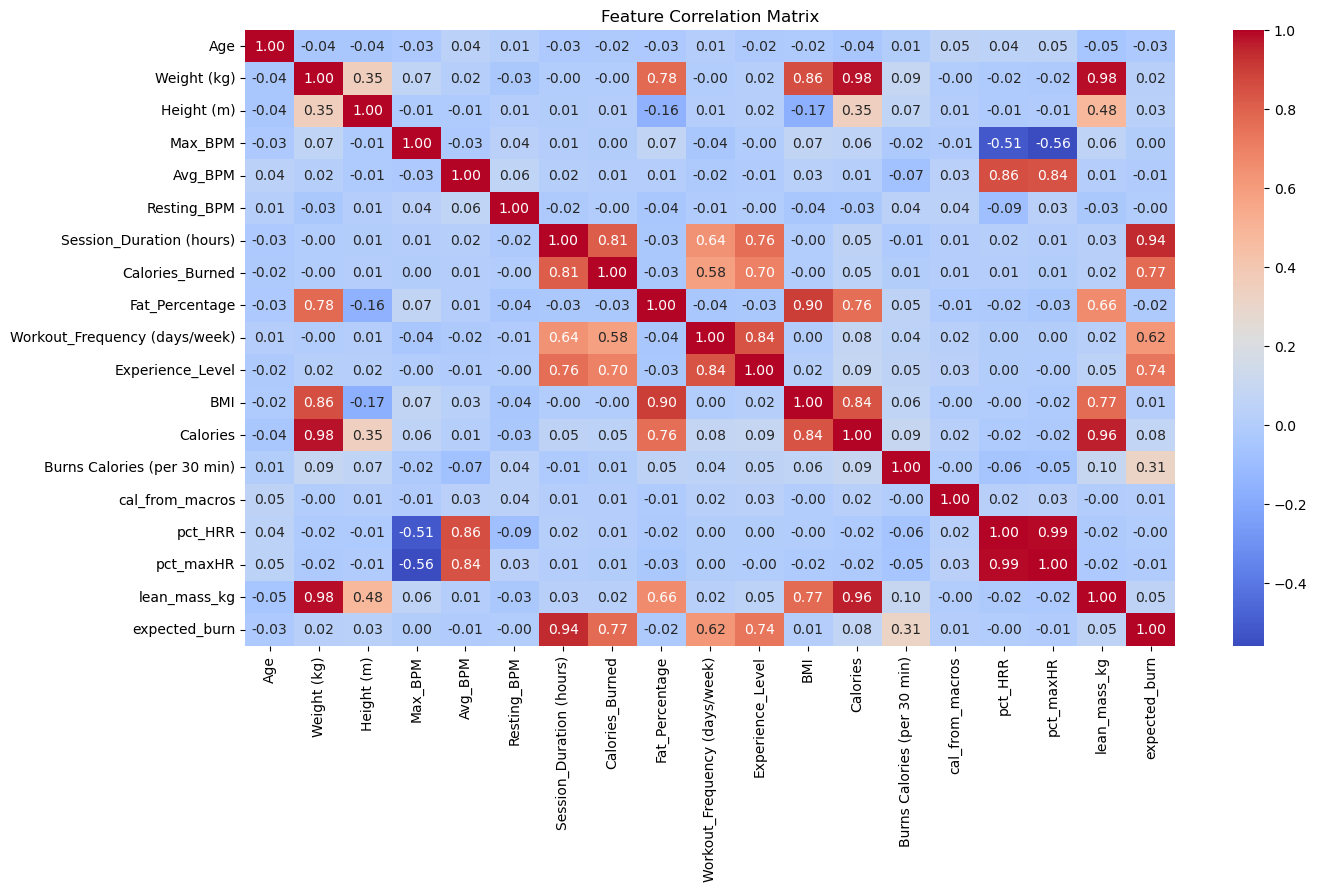

In [7]:
# Correlation Matrix
plt.figure(figsize=(15, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

#### Cell 5: Feature Selection and Splitting

In [8]:
# Define Features (X) and Target (y) using the NEW df_encoded
y = df_encoded['Calories_Burned']
x = df_encoded.drop('Calories_Burned', axis=1)

# Ensure inputs are float (helps prevent dtype issues)
x = x.astype(float)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.2)

#### Cell 6: Linear Regression (Statsmodels OLS)

In [9]:
# Add constant for OLS
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

# Fit OLS Model
ols_model = sm.OLS(y_train, x_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1793.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        03:02:07   Log-Likelihood:            -1.1308e+05
No. Observations:               16000   AIC:                         2.262e+05
Df Residuals:                   15980   BIC:                         2.263e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Cell 7: Scaling (Required for Regularization)

In [10]:
# Regularization models (Ridge, Lasso, ElasticNet) require scaled data
scaler = StandardScaler()

# Fit on training set only to prevent data leakage
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert back to DataFrame for easier handling later
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

#### Cell 8: Ridge Regression (L2 Regularization)

In [11]:
# Using RidgeCV to find the best alpha automatically
# Alphas: List of regularization strengths to try
alphas_to_test = [0.01, 0.1, 1, 10, 100, 1000]

ridge_cv = RidgeCV(alphas=alphas_to_test, cv=5)
ridge_cv.fit(x_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_cv.predict(x_test_scaled)

# Evaluation
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("="*30)
print("RIDGE REGRESSION RESULTS")
print("="*30)
print(f"Best Alpha: {ridge_cv.alpha_}")
print(f"R² Score: {r2_ridge}")
print(f"RMSE: {rmse_ridge}")

RIDGE REGRESSION RESULTS
Best Alpha: 1.0
R² Score: 0.6680778598364325
RMSE: 289.095806427738


#### Cell 9: LASSO Regression (L1 Regularization)

In [12]:
# Using LassoCV to find the best alpha automatically
lasso_cv = LassoCV(n_alphas=100, cv=5, random_state=10, max_iter=10000)
lasso_cv.fit(x_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_cv.predict(x_test_scaled)

# Evaluation
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("="*30)
print("LASSO REGRESSION RESULTS")
print("="*30)
print(f"Best Alpha: {lasso_cv.alpha_}")
print(f"R² Score: {r2_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"Number of features used: {np.sum(lasso_cv.coef_ != 0)}")

LASSO REGRESSION RESULTS
Best Alpha: 2.3440924435630244
R² Score: 0.6684246044323001
RMSE: 288.9447640749746
Number of features used: 6


#### Cell 10: Elastic Net (L1 + L2 Regularization)

In [13]:
# ElasticNetCV finds both best alpha and best l1_ratio
elastic_cv = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0], 
                          cv=5, random_state=10, max_iter=10000)
elastic_cv.fit(x_train_scaled, y_train)

# Predictions
y_pred_enet = elastic_cv.predict(x_test_scaled)

# Evaluation
rmse_enet = np.sqrt(mean_squared_error(y_test, y_pred_enet))
r2_enet = r2_score(y_test, y_pred_enet)

print("="*30)
print("ELASTIC NET RESULTS")
print("="*30)
print(f"Best Alpha: {elastic_cv.alpha_}")
print(f"Best L1 Ratio: {elastic_cv.l1_ratio_}")
print(f"R² Score: {r2_enet}")
print(f"RMSE: {rmse_enet}")

ELASTIC NET RESULTS
Best Alpha: 2.3440924435630244
Best L1 Ratio: 1.0
R² Score: 0.6684246044323001
RMSE: 288.9447640749746


#### Cell 11: Refined OLS with Selected Features

In [14]:
# Use ElasticNet (or Lasso) to select features with non-zero coefficients
selected_mask = elastic_cv.coef_ != 0
selected_features = x.columns[selected_mask]

print(f"Features selected by regularization: {list(selected_features)}")

# Subset the scaled data
x_train_refined = x_train_scaled_df[selected_features]
x_test_refined = x_test_scaled_df[selected_features]

# Add constant for Statsmodels
x_train_refined_const = sm.add_constant(x_train_refined)

# Fit OLS on refined features
ols_refined = sm.OLS(y_train.reset_index(drop=True), x_train_refined_const).fit()
print(ols_refined.summary())

Features selected by regularization: ['Resting_BPM', 'Session_Duration (hours)', 'Experience_Level', 'BMI', 'cal_from_macros', 'expected_burn']
                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     5680.
Date:                Wed, 26 Nov 2025   Prob (F-statistic):               0.00
Time:                        03:02:11   Log-Likelihood:            -1.1308e+05
No. Observations:               16000   AIC:                         2.262e+05
Df Residuals:                   15993   BIC:                         2.262e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|

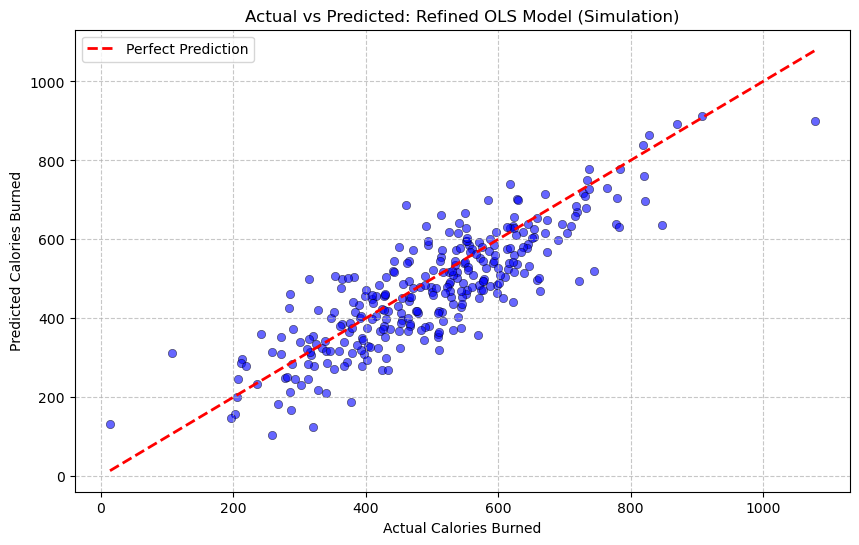

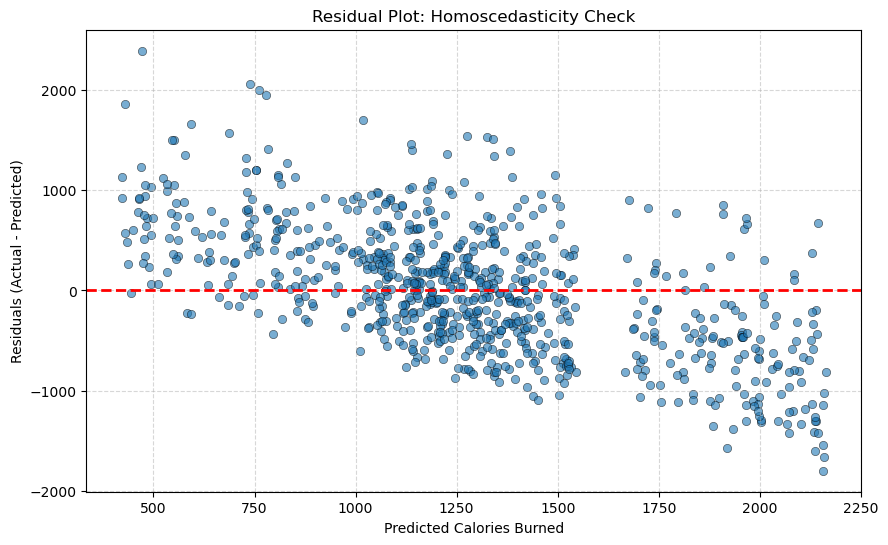

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Generate predictions on the refined test set
# Ensure the constant is added, as Statsmodels OLS does not add it by default
x_test_refined_const = sm.add_constant(x_test_refined)
y_pred = ols_refined.predict(x_test_refined_const)

# 2. Calculate Residuals
residuals = y_test - y_pred

# 3. Plot Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, edgecolor='k')

# 4. Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--', lw=2)

# 5. Labels and Title
plt.xlabel("Predicted Calories Burned")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Homoscedasticity Check")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()